## Capstone Project Daegu Apartmet

## **Business Problem and Data Understanding**


### Background
Apartemen merupakan salah satu solusi untuk memenuhi kebutuhan perumahan masyarakat modern akibat keterbatasan lahan perumahan dan aktivitas bisnis yang padat di kawasan perkotaan. Oleh karena itu, akan sangat menarik untuk menganalisis harga apartemen yang dipengaruhi oleh berbagai faktor internal dan eksternal. Perorangan atau perusahaan biasanya menawarkan unit apartemen. Para penawar dapat menjual unit di platform dengan menentukan harga apartemen mereka. Cara tersebut cukup sulit bagi pemilik apartemen untuk menyesuaikan dengan harga pasar. Jika harga terlalu tinggi dibandingkan harga pasar, tentu akan sulit untuk melakukan penjualan. Sebaliknya, jika terlalu rendah, pemilik akan kesulitan mendapatkan keuntungan maksimal.

### Goals

Berdasarkan permasalahan yang ada, diperlukan sebuah model yang dapat membantu pemilik apartemen menentukan harga yang kompetitif bagi apartemen beserta fasilitas yang akan ditawarkan. Berbagai kelebihan (fitur) yang dimiliki oleh suatu apartemen, seperti jumlah fasilitas, jarak ke fasilitas publik terdekat, dan tipe apartemen dapat meningkatkan keakuratan prediksi harga jual yang paling kompetitaf dan sesuai.
 

### Analytic Approach

Diperlukan analisis terhadap data untuk dapat menemukan pola dari fitur-fitur pembeda satu apartemen dengan apartemen lainnya. Selanjutnya, akan dibangun suatu model regresi yang akan membantu menentukan harga jual apartemen beserta fitur yang berpengaruh pada harga jual.

<hr>

## **Data Understanding**
- Dataset merupakan data listing Apartment di Kota Daegu.
- Setiap baris data merepresentasikan informasi terkait properti dan harga.

### Importing libraries

In [323]:
#Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [324]:
# Load dataset
df = pd.read_csv('daeguapt.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


Untuk memudahkan file yang semula data_daegu_apartment.csv diubah menjadi daeguapt.csv


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


**Attributes Information**


| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType  | object | Tipe Apartemen |
| TimeToSubway | object | Jarak Stasiun Terdekat (min)  |
| SubwayStation | object | Nama Stasiun Terdekat |
| N_FacilitiesNearBy(ETC) | float64 | Jumlah Fasilitas Terdekat |
| N_FacilitiesNearBy(Public Office) | float64 | Jumlah Kantor Pemerintah Terdekat |
| N_SchoolNearBy(University) | float64 | Jumlah Universitas Terdekat |
| N_Parkinglot(Basement) | float64 | Jumlah (Basemen) Lahan Parkir |
| YearBuilt | int64 | Tahun Pembangunan |
| N_FacilitiesInApt | int64 | Jumlah Fasilitas Apartment |
| Size(sqf) | int64 | Luas Apartment |
| SalePrice | int64 | Harga Jual Apartment (Won) |




In [326]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


### **Data Cleaning, Feature selection, & Feature Engineering**

### **Data cleaning**

### Cek missing value

In [327]:
# Melakukan cek Missing value
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

tidak ditemukan missing value pada dataset, sekarang kita akan mengecek duplikasi data

In [328]:
# Melakukan cek duplikasi

df.duplicated().sum()
dup = df[df.duplicated()]
dup

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


ada sekitar 1422 data duplikasi dalam 11 kolom, kemudian kita akan melakukan treatment dengan drop value. Oleh karena itu, dilakukan drop value duplikat dengan tetap meninggalkan satu record value paling pertama.

In [329]:
df.drop_duplicates(keep='first', inplace=True)

In [330]:
df.duplicated().sum()

np.int64(0)

Setelah dilakukan pengecekan ulang, dapat dilihat bahwa tidak ditemukan lagi record value yang duplikat.
Kemudian kita akan melakukan pengecekan kembali pada informasi data.

In [331]:
#cek dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


Kita akan melakukan perubahan pada data yang bertipe float64 menjadi int64 untuk memudahkan pemodelan nantinya.

In [332]:
#mengubah tipe data seluruh N_FacilitiesNearBy dan N_Parkinglot(Basement) menjadi int
df['N_FacilitiesNearBy(ETC)'] = df['N_FacilitiesNearBy(ETC)'].astype(np.int64)
df['N_FacilitiesNearBy(PublicOffice)'] = df['N_FacilitiesNearBy(PublicOffice)'].astype(np.int64)
df['N_SchoolNearBy(University)'] = df['N_SchoolNearBy(University)'].astype(np.int64)
df['N_Parkinglot(Basement)'] = df['N_Parkinglot(Basement)'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


Kemudian kita akan melihat untuk data numerikal.

In [333]:
#cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'object'))]
df[num_features].describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [334]:
#cek YearBuilt yang < 2000
df[df['YearBuilt'] < 2000]['YearBuilt'].count()

np.int64(858)

### Outliers

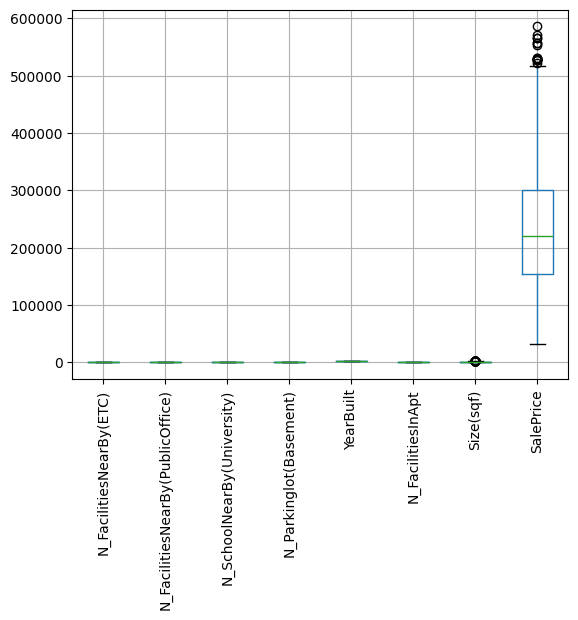

In [335]:
# Plot boxplot untuk mengecek outliers
df.boxplot(rot=90)
plt.show()

In [336]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

Kita akan lihat Outlier ataupun anomali data pada beberapa feature dengan mengggunakan IQR

In [337]:
# Outliers pada fitur SalePrice
find_anomalies(df['SalePrice'])

IQR: 147345.0
limit_bawah: -67478.5
limit_atas: 521901.5


In [338]:
# Outliers pada fitur Size(sqf)
find_anomalies(df['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0


In [339]:
# Outliers pada fitur N_FacilitiesInApt
find_anomalies(df['N_FacilitiesInApt'])

IQR: 3.0
limit_bawah: -0.5
limit_atas: 11.5


In [340]:
# Outliers pada fitur N_Parkinglot(Basement)
find_anomalies(df['N_Parkinglot(Basement)'])

IQR: 617.0
limit_bawah: -744.5
limit_atas: 1723.5


Kita bisa menemukan adanya beberapa outlier pada kolom saleprize dan size(sqf). Dimana semakin luas tempatnya maka harga yang dihasilkan juga tinggi.

### **FEATURE ENGINEERING**

Selanjutnya, dapat dilakukan feature engineering terhadap fitur-fitur numerikal.

- SalePrice

In [341]:
#cek deskriptif statistik kolom SalePrice
df['SalePrice'].describe()

count      2701.000000
mean     229511.365790
std      105079.891321
min       32743.000000
25%      153539.000000
50%      221238.000000
75%      300884.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [342]:
#cek SalePrice > 521901.5
df[df['SalePrice'] > 521901.5].count()['SalePrice']

np.int64(17)

Insight:
- Terdapat 75% data pada kolom SalePrice bernilai kurang dari 300884.000000, sedangkan nilai maksimalnya adalah 585840.000000. Dengan demikian, terdapat *positive skewness* pada distribusi nilai yang sedikit memanjang di sebelah kanan. 
- Terdapat 17 data yang memiliki value SalePrice lebih dari 521901.5 (limit atas Metode IQR). Untuk mengurangi *skewness* akan dilakukan penghapusan data yang memiliki value lebih dari limit atas Metode IQR ke dalam pemodelan.

In [343]:
#melakukan filtering pada data
df = df[(df['SalePrice'] <= 521901.5)]

In [344]:
#cek deskriptif statistika kolom SalePrice setelah filtering
df['SalePrice'].describe()

count      2684.000000
mean     227524.476528
std      102380.847211
min       32743.000000
25%      153097.000000
50%      220088.000000
75%      297455.500000
max      517699.000000
Name: SalePrice, dtype: float64

- Size(sqf)

In [345]:
#cek deskriptif statistik fitur Size(sqf)
df['Size(sqf)'].describe()

count    2684.000000
mean      978.779434
std       387.404559
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [346]:
#cek jumlah value Size(sqf) > 1803.0
df[df['Size(sqf)'] > 1803.0].count()['Size(sqf)']

np.int64(73)

Insight:
 ada sekitar 73 data yang nilainya melebihi nilai IQR maksimal (1803.0) pada fitur size (sqf) dimana pada fitur ini juga mengalami right skewes. Maka kita akan drop juga value yang melebihi IQR pada fitur Size (sqf).

In [347]:
#melakukan filtering pada data Size(sqf) tidak lebih dari 1803.0
df = df[df['Size(sqf)'] <= 1803.0]

In [348]:
#cek deskriptif statistika kolom Size(sqf) setelah filtering
df['Size(sqf)'].describe()

count    2611.000000
mean      946.851015
std       340.673791
min       135.000000
25%       743.000000
50%       910.000000
75%      1149.000000
max      1796.000000
Name: Size(sqf), dtype: float64

- N_FacilitiesInApt

In [349]:
#cek deskriptif statistik fitur N_FacilitiesInApt
df['N_FacilitiesInApt'].describe()

count    2611.000000
mean        5.683263
std         2.367327
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: N_FacilitiesInApt, dtype: float64

In [350]:
#cek jumlah value N_FacilitiesInApt > 11.5
df[df['N_FacilitiesInApt'] > 11.5].count()['N_FacilitiesInApt']

np.int64(0)

- N_Parkinglot(Basement)

In [351]:
#cek deskriptif statistik fitur N_Parkinglot(Basement)
df['N_Parkinglot(Basement)'].describe()

count    2611.000000
mean      525.471850
std       415.611063
min         0.000000
25%       181.000000
50%       536.000000
75%       798.000000
max      1321.000000
Name: N_Parkinglot(Basement), dtype: float64

In [352]:
#cek jumlah value N_Parkinglot(Basement) > 1723.5
df[df['N_Parkinglot(Basement)'] > 1723.5].count()['N_Parkinglot(Basement)']

np.int64(0)

insight:
Terdapat 0 data yang memiliki value N_FacilitiesInApt > 11.5 dan N_Parkinglot(Basement) > 1723.5 (limit atas Metode IQR) yang berarti fitur N_FacilitiesInApt dan N_Parkinglot(Basement) *tidak memiliki andil* dalam skewness.

### **DROP COLUMN - CLEAN DATA SET**

In [353]:
#cek dataset yang sudah bersih
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2611 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2611 non-null   object
 1   TimeToSubway                      2611 non-null   object
 2   SubwayStation                     2611 non-null   object
 3   N_FacilitiesNearBy(ETC)           2611 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2611 non-null   int64 
 5   N_SchoolNearBy(University)        2611 non-null   int64 
 6   N_Parkinglot(Basement)            2611 non-null   int64 
 7   YearBuilt                         2611 non-null   int64 
 8   N_FacilitiesInApt                 2611 non-null   int64 
 9   Size(sqf)                         2611 non-null   int64 
 10  SalePrice                         2611 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 244.8+ KB


Untuk selanjutnya, kita akan drop kolom fitur yang tidak dibutuhkan.

In [355]:
df= df.drop(columns=['TimeToSubway'])

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2611 entries, 0 to 4121
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2611 non-null   object
 1   SubwayStation                     2611 non-null   object
 2   N_FacilitiesNearBy(ETC)           2611 non-null   int64 
 3   N_FacilitiesNearBy(PublicOffice)  2611 non-null   int64 
 4   N_SchoolNearBy(University)        2611 non-null   int64 
 5   N_Parkinglot(Basement)            2611 non-null   int64 
 6   YearBuilt                         2611 non-null   int64 
 7   N_FacilitiesInApt                 2611 non-null   int64 
 8   Size(sqf)                         2611 non-null   int64 
 9   SalePrice                         2611 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 224.4+ KB


Insight: Setelah melakukan feature engineering, sebanyak 2611 record data yang akan digunakan untuk pemodelan. Sampai dengan proses ini, terdapat 1512/4123 record data yang tereliminasi.

<hr>

## **Modeling**

**Metric Evaluation**

Matriks evalusasi yang akan digunakan untuk model regresi yang dibangun adalah RMSE.


#### **Import libraries for modelling**

In [357]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [358]:
#Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['SubwayStation', 'HallwayType']),
    ('Binary', ce.BinaryEncoder(), ['SubwayStation'])
], remainder='passthrough')

#### **Data Splitting**

In [359]:
# Memisahkan data independen variabel dengan target
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
print(X,y)

     HallwayType          SubwayStation  N_FacilitiesNearBy(ETC)  \
0       terraced  Kyungbuk_uni_hospital                        0   
1       terraced  Kyungbuk_uni_hospital                        1   
2          mixed       Chil-sung-market                        1   
3          mixed                Bangoge                        5   
4       terraced                Sin-nam                        0   
...          ...                    ...                      ...   
4116    terraced                Sin-nam                        0   
4117       mixed              Myung-duk                        5   
4118    terraced                Sin-nam                        0   
4119       mixed              Myung-duk                        5   
4121    corridor                  Daegu                        2   

      N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
0                                    3                           2   
1                                    5     

**Train and Test Splitting**

Dilakukan pemisahan data dengan rincian sebagai berikut :
- X : fitur-fitur
- y : target

Adapun test_size yang digunakan kali ini yaitu sebesar 20% dan untuk training size sebesar 80%.

In [360]:
#splitting data training dan test 80%:20%
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=0)

In [361]:
X.head(2)

,HallwayType,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
0,terraced,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387
1,terraced,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914


In [362]:
X.describe().columns.to_list()

['N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'YearBuilt',
 'N_FacilitiesInApt',
 'Size(sqf)']

#### **Memilih Benchmark Model**

Pemilihan algoritma regresi yang akan digunakan dalam pembangunan model pembelajaran mesin.

In [363]:
#define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

#scaling data
scaler = StandardScaler()

#kandidat algoritma
models = [lr, knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )
    print(model_cv_rmse, i)
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )
    print(model_cv_mae, i)
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

[-52194.88255993 -49726.31025044 -51545.44778429 -52988.40811451
 -49232.62631367] LinearRegression()
[-42747.38477035 -40925.84278783 -42275.84373667 -43677.52167623
 -40208.12173099] LinearRegression()
[-48730.87275341 -49788.14335032 -49758.7796143  -49659.50570594
 -45294.39091501] KNeighborsRegressor()
[-38537.73875598 -40110.43157895 -39599.44019139 -39616.68057554
 -36003.88585132] KNeighborsRegressor()
[-49697.42364015 -45624.73114185 -45336.92351151 -47369.70775248
 -44346.40287871] DecisionTreeRegressor(random_state=0)
[-37703.91411565 -36942.2046132  -36690.80529742 -38122.0405618
 -35660.84384757] DecisionTreeRegressor(random_state=0)
[-46269.03784573 -45563.58848703 -45436.88307644 -46848.2618335
 -44315.17687741] RandomForestRegressor(random_state=0)
[-37317.90127885 -36904.66207901 -36698.26121026 -38011.41287683
 -35650.2278272 ] RandomForestRegressor(random_state=0)
[-46114.90234375 -45621.9453125  -45360.5625     -47454.3671875
 -44347.41796875] XGBRegressor(base_scor

In [364]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE
0,Linear Regression,-51137.535005,1437.382370,-41966.942940,1249.634374
1,KNN Regressor,-48646.338468,1721.072339,-38773.635391,1476.947022
2,DecisionTree Regressor,-46475.037785,1883.274648,-37023.961687,853.683801
3,RandomForest Regressor,-45686.589624,854.047284,-36916.493054,776.037462
4,XGBoost Regressor,-45779.839063,1016.746311,-36908.775781,794.141253


Insight:
- Berdasarkan nilai RMSE dan MAE, XGBoost dan RandomForest Regressor adalah model terbaik.

Selanjutnya dilakukan test set dengan 2 benchmark model terbaik menurut kedua algoritma, yaitu XGBoost dan RandomForest Regressor.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan RandomForest Regressor.

In [365]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=0),
    'RandomForest': RandomForestRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae}, index=models.keys())
score_before_tuning

,RMSE,MAE
XGB,44940.297462,35859.527344
RandomForest,44919.208514,35898.096755


Insight;
- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE (44940.297462) dan MAE (35859.527344) yang sedikit lebih rendah dibandingkan dengan nilai RMSE (44919.208514) dan MAE RandomForest (35898.096755). 

**Hyperparameter Tuning**

Dikarenakan model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka kita akan menggunakan model XGBoost ini sebagai model final. Pada tahap ini, akan dilakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model dengan merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [366]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [367]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
#     scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 1 
)

In [368]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['SubwayStation',
                                                                                'HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=N...
                                                             np.float64(0.46415888336127775),
                                                             np.float64(1.2915496650148828),
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error'])

In [369]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
24,0.185262,0.019951,0.025573,0.004053,0.9,10.000000,146,4,0.06,5,...,852.154809,1,-37314.753906,-35932.152344,-36737.582031,-37677.542969,-35408.656250,-36614.137500,843.234474,1
22,0.200040,0.023367,0.023705,0.004408,0.7,0.002783,155,4,0.25,8,...,849.378596,2,-36582.867188,-36806.597656,-36573.945312,-37967.136719,-35423.523438,-36670.814063,808.918009,3
45,0.158375,0.004941,0.021645,0.000745,0.6,0.007743,123,4,0.44,6,...,731.571653,3,-37014.003906,-36112.257812,-37034.632812,-37742.714844,-35693.070312,-36719.335938,728.740105,4
17,0.251608,0.008885,0.022326,0.001672,0.6,0.001000,190,5,0.04,9,...,824.343272,4,-36806.890625,-36503.285156,-36673.914062,-37822.992188,-35495.941406,-36660.604688,742.147076,2
7,0.242796,0.017347,0.024372,0.002522,0.9,0.059948,119,8,0.05,5,...,707.916936,5,-36778.656250,-36807.335938,-36773.144531,-37775.332031,-35628.625000,-36752.618750,680.205504,6


In [370]:
# Melakukan pengecekan skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -45171.75234375
Best_params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(10.0), 'model__n_estimators': np.int64(146), 'model__max_depth': np.int64(4), 'model__learning_rate': np.float64(0.06), 'model__gamma': np.int64(5), 'model__colsample_bytree': np.float64(0.4)}


Insight:

Kombinasi parameter tersebut menunjukkan bahwa model yang terbentuk bersifat stabil dan tidak terlalu kompleks, dengan tingkat regularisasi yang cukup tinggi (reg_alpha = 10.0) untuk menghindari overfitting. Nilai learning_rate yang rendah (0.06) memungkinkan model belajar secara bertahap sehingga meningkatkan kemampuan generalisasi terhadap data baru.

Secara keseluruhan, hasil tuning ini menunjukkan bahwa model XGBoost mampu menyeimbangkan antara kompleksitas dan akurasi, sehingga layak digunakan sebagai model prediksi harga apartemen yang andal pada data uji yang memiliki karakteristik serupa dengan data latih.

**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [371]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE
XGB,44831.974304,35873.828125


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [372]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE
XGB,44940.297462,35859.527344


In [373]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE
XGB,44831.974304,35873.828125


Insight:

Model mengalami peningkatan performa (terlihat dari nilai RMSE & MAE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE & MAE sebelum tuning: 44909.530074, 35796.168589
- RMSE & MAE setelah tuning: 44827.096017, 35934.340852

#### **Model Visualization**

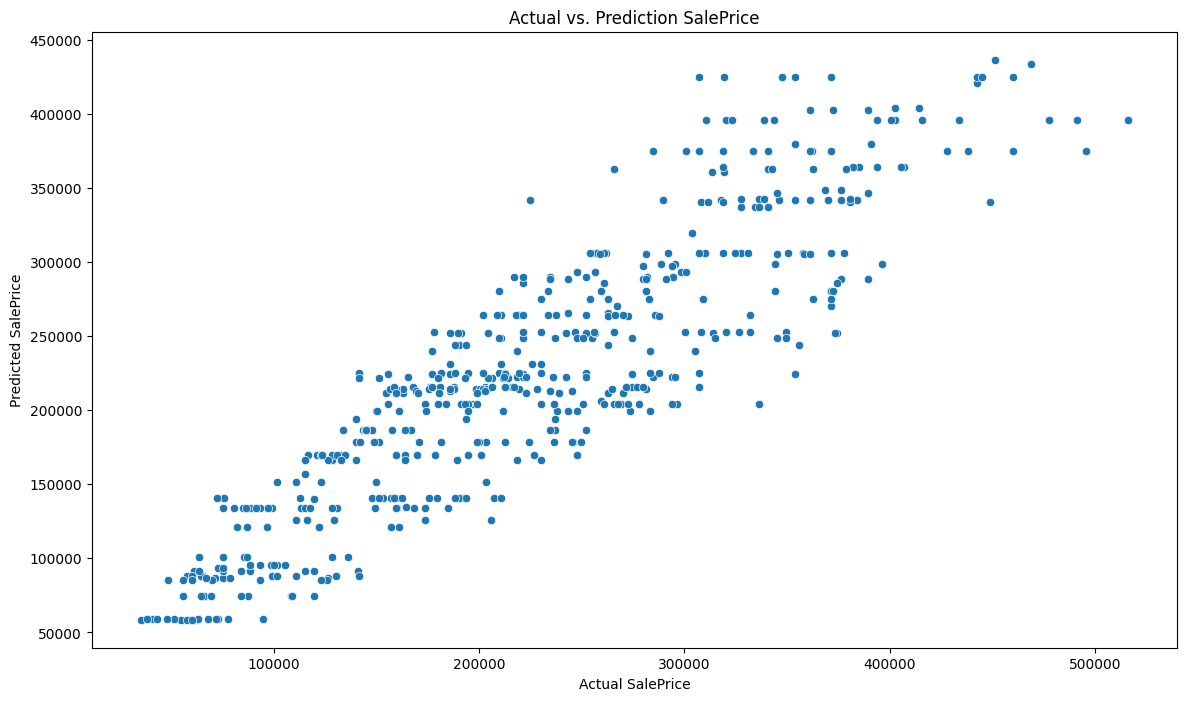

In [374]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction SalePrice', 
                                               xlabel='Actual SalePrice', 
                                               ylabel='Predicted SalePrice')
plt.show()

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

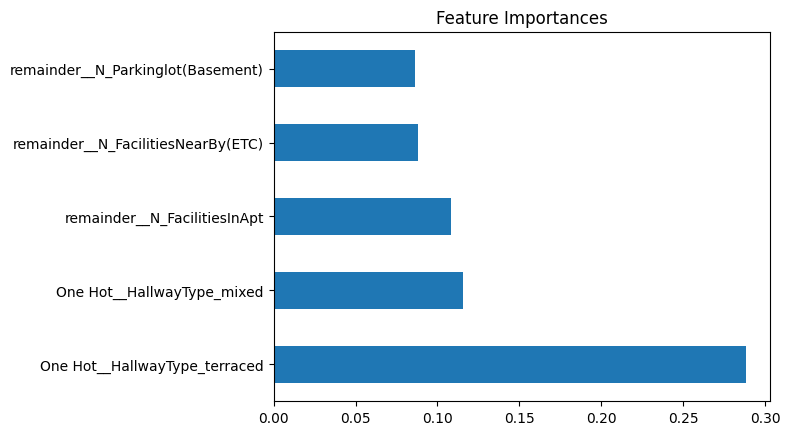

In [375]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');
plt.show()

Insight:

Kesimpulan yang didapatkan dari pemodelan regresi adalah terdapat 4 dari 10 fitur yang memiliki pengaruh erat terhadap SalePrice. Keempat fitur tersebut adalah HallwayType, N_Parkinglot(Basement), N_FacilitiesInApt, Size(sqf) dan YearBuilt.


### Save Model in Pickle

In [376]:
import pickle

In [377]:
estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_DaeguApartment.sav', 'wb'))

In [378]:
# Load model
filename = 'Model_DaeguApartment.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [379]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

np.float64(44940.29746229991)

Selanjutnya dalam tahap end to end, kita akan mencoba melakukan predict test pada machine learning yng telah dilatih.

### Predict to Data

In [380]:
test = X_test.sample(20)
test

,HallwayType,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
314,terraced,Kyungbuk_uni_hospital,1,2,2,184,2006,5,814
1247,terraced,Kyungbuk_uni_hospital,1,5,1,0,1986,4,1377
508,terraced,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387
78,corridor,Myung-duk,5,7,5,0,1992,3,355
3228,corridor,Kyungbuk_uni_hospital,0,3,2,0,1978,3,903
2527,terraced,Myung-duk,5,7,5,1174,2014,9,910
2348,terraced,Banwoldang,0,4,1,605,2007,5,1629
3565,terraced,Sin-nam,0,3,2,475,2008,8,829
743,terraced,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643
165,terraced,no_subway_nearby,0,1,1,1321,2015,10,644


In [381]:
y_future = y_test.loc[test.index.to_list()]
y_future

314     154867
1247    185840
508     318584
78       63274
3228    189380
2527    361061
2348    460176
3565    242477
743     323389
165     256637
1922    130973
3253    123008
2471    185840
469     389380
438     267256
511     208849
3006     87610
356     261061
809      60176
4045    427876
Name: SalePrice, dtype: int64

In [382]:
y_future_pred = loaded_model.predict(test)
y_future_pred

array([207030.66 , 233657.1  , 379395.25 ,  55376.637, 165883.81 ,
       339328.2  , 433060.6  , 221572.88 , 396023.16 , 288271.47 ,
       132273.84 , 168648.08 , 256233.06 , 413238.8  , 275619.6  ,
       260200.22 ,  75756.08 , 206181.23 ,  90141.25 , 379395.25 ],
      dtype=float32)

In [383]:
mean_absolute_error(y_future,y_future_pred)

35614.69140625

In [384]:
X_test.columns

Index(['HallwayType', 'SubwayStation', 'N_FacilitiesNearBy(ETC)',
       'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)',
       'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt',
       'Size(sqf)'],
      dtype='object')

### Predict New Data

In [385]:
X.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
count,2611.000000,2611.000000,2611.000000,2611.000000,2611.00000,2611.000000,2611.000000
mean,1.906549,4.046342,2.679433,525.471850,2002.40023,5.683263,946.851015
std,2.150577,1.884540,1.507667,415.611063,9.19855,2.367327,340.673791
min,0.000000,0.000000,0.000000,0.000000,1978.00000,1.000000,135.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.00000,4.000000,743.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.00000,5.000000,910.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.00000,7.000000,1149.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.00000,10.000000,1796.000000


Kita akan melakukan test-predict dimana kita akan membuat asumsi apartemen merupakan bangunan dengan:

- HallwayType: terraced
- SubwayStation:Kyungbuk_uni_hospital
- N_FacilitiesNearBy(ETC):4
- N_FacilitiesNearBy(PublicOffice):2
- N_SchoolNearBy(University):1
- N_Parkinglot(Basement):1
- YearBuilt:2007
- N_FacilitiesInApt:3
- Size(sqf):300


In [386]:
test_predict=pd.DataFrame({
    'HallwayType':["terraced"],
    'SubwayStation':["Kyungbuk_uni_hospital"],
    'N_FacilitiesNearBy(ETC)':[4],
    'N_FacilitiesNearBy(PublicOffice)':[2],
    'N_SchoolNearBy(University)':[1],
    'N_Parkinglot(Basement)':[1],
    'YearBuilt':[2007],
    'N_FacilitiesInApt':[3],
    'Size(sqf)':[300],
    
    
})

print('SalePrice prediction: ',loaded_model.predict(test_predict)[0])


SalePrice prediction:  189498.73


Insight: 

SalePrice prediction terhadap data **test predict** yaitu **189498.73**, dimana ini termasuk harga yang mendekati **median SalePrice** apartment yang dekat dengan **subwaystation Kyungbuk_uni_hospital** dengan tipe **hallway terraced** yang populer yaitu **238938.0**. Adapun hal yang mempengaruhi hasli test predict  sendiri dikarenakan adanya faktor dari jumlah 4 fitur yang mempengaruhi SalePrice khususnya untuk fitur **size(sqf)** dan **N_FacilitiesApt** yang mana dapat mempengaruhi harga jual.

***
### **CONCLUSION**

Pengembangan model *machine learning* berbasis **XGBoost Regressor** dapat memprediksi harga jual apartemen di wilayah Daegu dengan mempertimbangkan berbagai variabel seperti: ukuran unit, tahun pembangunan, jumlah fasilitas di sekitar dan di dalam apartemen, tipe lorong (Hallway Type), serta kedekatan dengan stasiun subway dan fasilitas umum lainnya. Terdapat 4 dari 10 fitur yang memiliki pengaruh erat terhadap SalePrice (HallwayType, N_Parkinglot(Basement), N_FacilitiesInApt, Size(sqf) dan YearBuilt).

Model yang dihasilkan dapat menunjukkan performa yang cukup baik dan stabil. Hal ini bisa dilihat dari nilai **RMSE (Root mean Squared Error)** sebesar 44831.974304 dan **MSE** skor terbaik sebesar -45.171,75 (karena proses optimasi menggunakan nilai skor negatif). Nilai ini menunjukkan bahwa model memiliki tingkat kesalahan prediksi yang relatif rendah terhadap data uji.

Dengan tingkat regularisasi yang cukup tinggi (reg_alpha = 10.0) untuk menghindari overfitting. Nilai learning_rate terbaik 0.06 memungkinkan model belajar secara bertahap sehingga meningkatkan kemampuan generalisasi terhadap data baru. Model XGBoost mampu menyeimbangkan antara kompleksitas dan akurasi, sehingga layak digunakan sebagai model prediksi harga apartemen yang andal pada data uji yang memiliki karakteristik serupa dengan data latih.

Implementasi model memiliki dampak positif terhadap proses bisnis dalam penentuan harga apartemen diantaranya:
 1. mengurangi resiko overpricing sebesar 20%-30% dibandingkan dengan penentuan manual
 2. meningkatkan efisiensi waktu dalam menentukan harga jual hingga 50% (manual bisa [berminggu-minggu](https://uniqueprop.com/blog/how-long-does-an-appraisal-take/) dan dengan machine learning butuh [beberapa jam/hari](https://learn.microsoft.com/en-us/answers/questions/1528058/how-long-does-it-typically-take-to-train-a-dataset))
 3. memberikan analisis yang lebih objektif serta berbasis data historis.



***
### **RECOMMENDATION**

Rekomendasi yang dapat dilakukan untuk mengembangkan model agar lebih lagi, antara lain :

1. Model layak digunakan ketika data input memiliki karakteristik yang sebanding dengan data training (misal.apartemen di wilayah perkotaan dengan struktur fasilitas dan infrastruktur yang serupa). Namun model ini kurang dapat diandalkan apabila diterapkan pada wilayah yang karakteristiknya berbeda secara signifikan (misal rural area).

2. Model belum mempertimbangkan faktor eksternal yang bersifat dinamis seperti tren ekonomi, inflasi, maupun perubahan suku bunga.

3. Variasi data yang terbatas dapat mempengaruhi kemampuan generalisasi model terhadap data baru.

Kedepannya, untuk pengembangan model dapat dilakukan perbaikkan sebagai berikut:

1. Menambahkan variabel eksternal berpengaruh terhadap harga properti, seperti indeks harga konsumen dan indikator ekonomi makro Korea Selatan.

2. Mengintegrasikan model dalam dashboard interaktif agar hasil prediksi dapat diakses dan dimanfaatkan secara langsung oleh perusahaan maupun individu yang menawarkan unit apartemen.